In [15]:
import pandas as pd

In [2]:
import pandas as pd

movies = pd.read_csv("datasets/netflix_v2.csv")

In [3]:
movies.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,fetched_description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...","""Dick Johnson Is Dead"" is a 2020 American docu..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","""Blood & Water"" is a South African teen myster..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"There are two movies with similar titles, resu..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","""Jailbirds: New Orleans"" is a three-part Netfl..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"""Kota Factory"" is an Indian Hindi-language web..."


In [4]:
# This code removes movies that either have:
# 1. A very short description (less than 200 characters), which likely means the description is missing or incomplete.
# 2. A placeholder or incorrect description marked with '**', indicating the AI agent failed to fetch the correct information for particular movie. Either it found more then one movie description.

movies = movies[
    (movies['fetched_description'].astype(str).str.len() >= 200) & 
    (~movies['fetched_description'].astype(str).str.contains(r"\*\*", na=False))
]

In [5]:
movies['desc_len'] = movies['fetched_description'].str.len()

In [6]:
movies.describe()

,release_year,desc_len
count,5494.000000,5494.000000
mean,2015.909720,827.788315
std,7.034714,195.559002
min,1925.000000,201.000000
25%,2016.000000,702.000000
50%,2018.000000,836.000000
75%,2020.000000,958.000000
max,2021.000000,1881.000000


In [7]:
len(movies)

5494

In [8]:
movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,fetched_description,desc_len
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...","""Dick Johnson Is Dead"" is a 2020 American docu...",834
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","""Blood & Water"" is a South African teen myster...",592
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","""Jailbirds: New Orleans"" is a three-part Netfl...",741
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"""Kota Factory"" is an Indian Hindi-language web...",720
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,24-Sep-21,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,"""Midnight Mass"" is a seven-episode Netflix min...",903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6039,s6040,Movie,A Haunted House,Michael Tiddes,"Marlon Wayans, Essence Atkins, Cedric the Ente...",United States,21-Feb-20,2013,R,86 min,"Comedies, Horror Movies",This spoof on scary movies follows a young cou...,"""A Haunted House"" (2013) is a raunchy horror c...",918
6040,s6041,Movie,A Haunting at Silver Falls: The Return,Teo Konuralp,"Laura Flannery, James Cavlo, Harry Hains, Clem...",United States,17-Sep-19,2019,TV-14,80 min,"Horror Movies, Independent Movies",When the ghost of her serial killer aunt seemi...,"""A Haunting at Silver Falls: The Return"" (2019...",878
6041,s6042,Movie,A Holiday Engagement,Jim Fall,"Bonnie Somerville, Shelley Long, Jordan Bridge...",United States,4-Nov-19,2011,TV-G,92 min,"Children & Family Movies, Comedies, Romantic M...",Hilary's plan to hire a good-looking guy to ac...,"""A Holiday Engagement"" (originally titled ""A T...",629
6042,s6043,Movie,A Kind of Murder,Andy Goddard,"Patrick Wilson, Jessica Biel, Vincent Kartheis...",United States,1-May-17,2016,R,96 min,Thrillers,"Obsessed with an unsolved murder case, a crime...","""A Kind of Murder"" is a 2016 American psycholo...",916


Data comparision of old description vs new agent fetched description

In [9]:
print(movies.iloc[3]['fetched_description'])
print(len(movies.iloc[3]['fetched_description']))
print(movies.iloc[3]['description'])
print(len(movies.iloc[3]['description']))

"Kota Factory" is an Indian Hindi-language web series depicting the lives of students in Kota, Rajasthan, a hub for IIT-JEE and NEET coaching.  The series follows 16-year-old Vaibhav Pandey as he moves from Itarsi to Kota to prepare for the IIT entrance exam.  It realistically portrays the challenges faced by students, including intense competition, academic pressure, and the demanding coaching culture.  The show features a memorable teacher, Jeetu Bhaiya, who acts as a mentor to Vaibhav and his friends.  The series, known for its black-and-white cinematography, received critical acclaim for its realistic portrayal of the competitive environment and the struggles of students pursuing higher education in India.

720
In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.
152


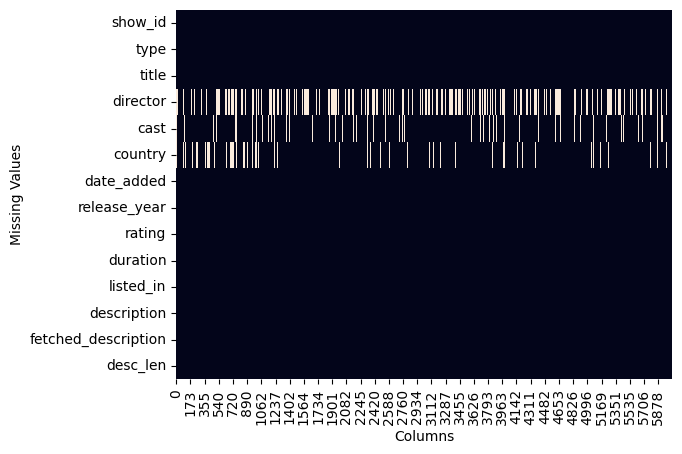

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = plt.axes()

sns.heatmap(movies.isna().transpose(), cbar=False, ax = ax)
plt.xlabel("Columns")
plt.ylabel("Missing Values")

plt.show()


In [11]:
def build_full_description(row):
    parts = []

    # # Title (always present)
    # parts.append(f'"{row["show_id"]}"')

    # Title (always present)
    parts.append(f'"{row["title"]}"')

    # Type and release year
    if pd.notnull(row['type']) and pd.notnull(row['release_year']):
        parts.append(f'is a {row["release_year"]} {row["type"].lower()}')

    # Country (optional)
    if pd.notnull(row['country']):
        parts.append(f'from {row["country"]}')

    # Director
    if pd.notnull(row['director']):
        parts.append(f'directed by {row["director"]}')

    # Cast
    if pd.notnull(row['cast']):
        parts.append(f'starring {row["cast"]}')

    # Duration
    if pd.notnull(row['duration']):
        parts.append(f'with a runtime of {row["duration"]}')

    # Rating
    if pd.notnull(row['rating']):
        parts.append(f'(Rated {row["rating"]})')

    # Genres / Category
    if pd.notnull(row['listed_in']):
        parts.append(f'Genres: {row["listed_in"]}')

    # Fetched description (last so it flows like a summary)
    if pd.notnull(row['fetched_description']):
        parts.append(row['fetched_description'])

    return '. '.join(parts)


# Apply the function to create a new column
movies['tagged_description'] = movies.apply(build_full_description, axis=1)


In [12]:
# movies["tagged_description"] = movies[["show_id", "fetched_description"]].astype(str).agg(" ".join, axis=1)
movies["tagged_description"][0]

'"Dick Johnson Is Dead". is a 2020 movie. from United States. directed by Kirsten Johnson. with a runtime of 90 min. (Rated PG-13). Genres: Documentaries. "Dick Johnson Is Dead" is a 2020 American documentary film directed by Kirsten Johnson.  It\'s a poignant and darkly humorous exploration of mortality, focusing on Johnson\'s father, Dick, who is suffering from dementia.  The film playfully imagines various ways Dick might die, staging these scenarios with his enthusiastic participation.  These fictional scenes are interwoven with genuine footage of their tender father-daughter relationship, creating a unique blend of fact and fiction.  The documentary tackles themes of aging, loss, and grief with a surprising grace and subversive humor, ultimately celebrating life and the unique bond between Dick and Kirsten.  Critically acclaimed, the film received a 100% rating on Rotten Tomatoes and an 89 Metascore, earning praise for its innovative storytelling and emotional resonance.\n'

In [13]:
movies["tagged_description"] = movies["tagged_description"].astype(str).str.replace("\n", "", regex=False)
movies["tagged_description"] = movies["tagged_description"].astype(str).str.replace("\"", "", regex=False)

In [29]:
movies["tagged_description"].to_csv("tagged_description.txt", index=False, header=False, lineterminator="\n")

In [14]:
movies.to_csv("datasets/netflix_v3.csv")